# Customs Import Declaration Dataset Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_color_codes("muted")

## Introduction
Our dataset is synthetic customs import declarations. Each row contains the information of each report on the imported goods and each column indicates the attributes of the import declaration form.

## Peek the Data

In [2]:
df = pd.read_csv("./data/df_syn_eng.csv")

In [3]:
# First 5 rows in our dataset
df.head()

,Declaration ID,Date,Office ID,Process Type,Import Type,Import Use,Payment Type,Mode of Transport,Declarant ID,Importer ID,...,HS6 Code,Country of Departure,Country of Origin,Tax Rate,Tax Type,Country of Origin Indicator,Net Mass,Item Price,Fraud,Critical Fraud
0,97061800,2020-01-01,30,B,11,21,11,10,ZZR1LT6,QLRUBN9,...,440890,BE,BE,0.0,FEU1,G,108.0,372254.40,0,0
1,85945189,2020-01-01,40,B,11,21,11,40,SWF9S4X,7JD1S2X,...,690722,CN,CN,8.0,A,Y,11352.0,375751.20,0,0
2,77854751,2020-01-01,20,B,11,21,11,40,X4XT6P8,WI9O3I5,...,620822,CN,CN,5.2,FCN1,B,20.7,5353.02,0,0
3,46925060,2020-01-01,40,B,11,21,43,40,K7LCQTZ,6LI9721,...,940350,VN,VN,0.0,C,Y,9218.0,1477645.40,0,0
4,34131149,2020-01-01,20,B,11,21,11,10,1HMVIVH,RZ871V1,...,71080,VN,VN,27.0,A,B,24000.0,6364800.00,0,0


In [4]:
# Number of rows and columns
df.shape

(54000, 22)

## Feature Overview
There are 22 columns in the dataset. Columns with "object" data types are categorical variables, while the others are numerical variables.

| Attribute               | Description                                              |
| :------------------ | :------------------------------------------------- |
| Declaration ID           | Primary key of the record                           |
| Date           | Date when the declaration is reported                           |
| Office ID       | Customs office that receives the declaration (e.g., Seoul regional customs)                               |
| Process type | Type of the declaration process (e.g., Paperless declaration) |
| Import type | Code for import type (e.g., OEM import, E-commerce)                         |
| Import use | Code for import use (e.g., Raw materials for domestic consumption)     |
| Payment type | Distinguish tariff payment type (e.g., Usance credit payable at sight)                        |
| Mode of transport | Nine modes of transport (e.g., maritime, rail, air)              |
| Declarant ID | Person who declares the item                  |
| Importer ID | Consumer who imports the item                             |
| Seller ID | Overseas business partner which supplies goods to Korea                           |
| Courier ID | Delivery service provider (e.g., DHL, FedEx)                     |
| HS6 code | 6-digit product code (e.g., 090121 = Coffee, Roasted, Not Decaffeinated)                             |
| Country of departure | Country from which a shipment has or is scheduled to depart             |
| Country of origin | Country of manufacture, production or design, or where an article or product comes from                            |
| Tax rate | Tax rate of the item (%)                              |
| Tax type | Tax types (e.g., FTA Preferential rate)               |
| Country of origin indicator | Way of indicating the country of origin (e.g., Mark on package)      |
| Net mass | Mass without any packaging (kg)                  |
| Item price | Assessed value of an item (KRW)                   |
| Fraud | Fraudulent attempt to reduce the customs duty (0/1)                                    |
| Crifical fraud | Critical case which may threaten the public safety (0/1)             |

In [5]:
# List of columns
df=df.astype({'Declaration ID':'str','Date':'datetime64', 'Office ID':'str', 'Process Type':'str', 
              'Import Type':'str', 'Import Use':'str', 'Payment Type':'str', 'Mode of Transport':'str', 
              'HS6 Code':'str', 'Fraud':'str', 'Critical Fraud':'str', 'Item Price':'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Declaration ID               54000 non-null  object        
 1   Date                         54000 non-null  datetime64[ns]
 2   Office ID                    54000 non-null  object        
 3   Process Type                 54000 non-null  object        
 4   Import Type                  54000 non-null  object        
 5   Import Use                   54000 non-null  object        
 6   Payment Type                 54000 non-null  object        
 7   Mode of Transport            54000 non-null  object        
 8   Declarant ID                 54000 non-null  object        
 9   Importer ID                  54000 non-null  object        
 10  Seller ID                    48799 non-null  object        
 11  Courier ID                   9538 non-nul

Columns *Seller ID* and *Courier ID* have null values.

In [6]:
# Number of unique values in each features are as in the following.
df.nunique()

Declaration ID                 54000
Date                             547
Office ID                         43
Process Type                       3
Import Type                       28
Import Use                        14
Payment Type                      10
Mode of Transport                  6
Declarant ID                    1238
Importer ID                    14482
Seller ID                      12201
Courier ID                        81
HS6 Code                        2489
Country of Departure             102
Country of Origin                119
Tax Rate                         122
Tax Type                          49
Country of Origin Indicator        6
Net Mass                        5704
Item Price                     15874
Fraud                              2
Critical Fraud                     3
dtype: int64

### 1. Date
*Date*(신고일자) means the reported date of the declaration. The range is from January 2020 to July 2021.

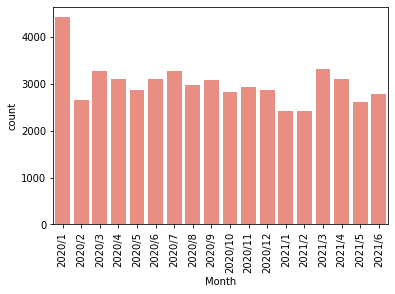

In [7]:
# Number of montly reported data
df_date_count = df["Date"].groupby([df.Date.dt.year.rename('year'), df.Date.dt.month.rename('month')]).agg({'count'})
df_date_count.index = df_date_count.index.map(lambda idx: f'{idx[0]}/{idx[1]}')
sns.barplot(x=df_date_count.index, y="count", data=df_date_count, color='salmon')
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.savefig('date.pdf', bbox_inches='tight')
plt.show()

### 2. Office ID
*Office ID*(신고세관부호) indicates the office that disposed the declaration. Each code refers customs offices in Korea. 

- **10**: Seoul Regional Customs
- **13**: Incheon Airport International Postal Customs
- **16**: Pyeongtaek Customs
- **20**: Incheon Regional Customs(Incheon Port)
- **30**: Busan Regional Customs
- **40**: Incheon Regional Customs(Airport)
- ... and so on.

In [8]:
# Values of Office ID
print('Values of Office ID :')
print([x for x in df["Office ID"].unique()])
print('Number of unique Office IDs : ' , df["Office ID"].nunique())

# Frequent Office IDs
pd.DataFrame(df["Office ID"].value_counts().reset_index().values, columns=["Office ID", "Count"]).head(10)

Values of Office ID :
['30', '40', '20', '10', '13', '62', '50', '16', '70', '80', '39', '120', '140', '12', '121', '131', '41', '21', '23', '56', '33', '14', '53', '152', '54', '151', '82', '150', '130', '122', '17', '110', '153', '100', '71', '60', '81', '90', '37', '154', '102', '51', '101']
Number of unique Office IDs :  43


,Office ID,Count
0,40,19860
1,20,16520
2,30,8642
3,16,2802
4,13,1380
5,10,901
6,33,891
7,39,474
8,62,400
9,80,281


### 3. Process Type
*Process Type*(수입신고구분코드) indicates the type of import declaration process. Each code refers to:
- **A**: Normal paperless declaration. Paperless means processed through electronic document.
- **B**: Normal document declaration
- **D**: Simplified document declaration

In [9]:
# Values of Process Type
print("Values of Process Type :", df["Process Type"].unique())
pd.DataFrame(df["Process Type"].value_counts().reset_index().values, columns=["Process Type", "Count"])

Values of Process Type : ['B' 'D' 'A']


,Process Type,Count
0,B,53992
1,D,7
2,A,1


Almost all data is process type B.

### 4. Import Type
*Import Type*(수입거래구분코드) indicates the content of import transaction or import contract.
For example, **11** means normal import. **87** means imported item without payment, such as sample.

In [10]:
# Values of Import Type
print("Values of Import Type :")
print([x for x in df["Import Type"].unique()])
print('Number of unique Import Types : ' , df["Import Type"].nunique())

# Frequent Import Types
pd.DataFrame(df["Import Type"].value_counts().reset_index().values, columns=["Import Type", "Count"]).head(10)

Values of Import Type :
['11', '80', '96', '93', '83', '94', '15', '89', '86', '29', '87', '92', '22', '88', '12', '51', '84', '85', '100', '71', '59', '21', '55', '13', '90', '53', '54', '49']
Number of unique Import Types :  28


,Import Type,Count
0,11,46678
1,87,2150
2,94,1777
3,15,954
4,89,750
5,29,373
6,88,230
7,83,184
8,84,147
9,93,121


86% of the data is Import type **11**.

### 5. Import Use
*Import Use*(수입 종류 부호) refers to type of import purpose or import condition. For example, **21** and **11** refer to normal import for domestic consumption and normal import for acquired foreign currency, respectively.

In [11]:
# Values of Import Use
print("Values of Import Use :")
print([x for x in df["Import Use"].unique()])
print('Number of unique Import Uses : ' , df["Import Use"].nunique())

# Frequent Import Uses
pd.DataFrame(df["Import Use"].value_counts().reset_index().values, columns=["Import Use", "Count"])

Values of Import Use :
['21', '26', '23', '15', '11', '31', '13', '28', '12', '27', '14', '17', '30', '24']
Number of unique Import Uses :  14


,Import Use,Count
0,21,49292
1,11,2471
2,26,1141
3,23,408
4,28,298
5,13,100
6,12,92
7,15,85
8,14,43
9,27,30


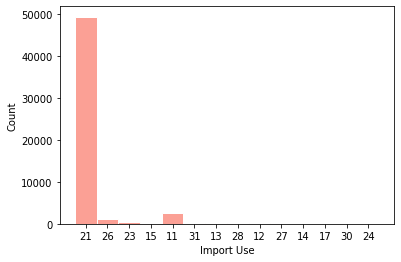

In [12]:
sns.histplot(data = df["Import Use"], color='salmon', edgecolor='1')
plt.savefig('ImportUse.pdf', bbox_inches='tight')

### 6. Payment Type
*Payment Type*(징수형태부호) indicates the type of taxation. Descriptions of example codes are as follows:

- **0**: Moratorium on taxation
- **11**: Tax payment is done before the acceptance of declaration. In other words, this type of declaration is accepted only after the tariff is payed.
- **12**,**13**,**14**,**18**: Tax payment after the accpetance of declaration. These types means the tariff can be payed after the the declaration is accepted, with the provision of security.
- **21**: Customs imposes and collects tariffs regardless of the payment. The example is the case that the declararnt violated a law.
- **43**: Tax is paied monthly, not per each declaration.

In [13]:
# Values of Payment Type
print("Values of Payment Type :")
print([x for x in df["Payment Type"].unique()])
print('Number of unique Payment Types : ' , df["Payment Type"].nunique())

# Frequent Payment Types
pd.DataFrame(df["Payment Type"].value_counts().reset_index().values, columns=["Payment Type", "Count"])

Values of Payment Type :
['11', '43', '18', '14', '33', '0', '13', '21', '1', '12']
Number of unique Payment Types :  10


,Payment Type,Count
0,11,36476
1,43,9999
2,18,3570
3,14,3230
4,0,324
5,13,291
6,21,66
7,12,23
8,33,19
9,1,2


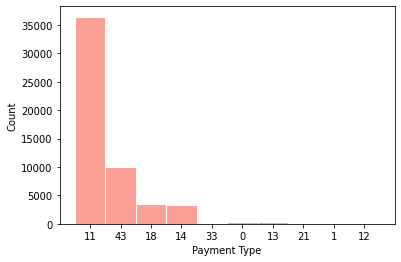

In [14]:
# Distribution of Payment Type
sns.histplot(data = df["Payment Type"], color='salmon', edgecolor='1')
plt.savefig('PaymetType.pdf', bbox_inches='tight')

Code **11** and **43** are most frequent.

### 7. Mode of Transport
*Mode of Transport*(운송수단유형코드) indicates the means of transportation of goods. Each code indicates:
- **10**: Maritime
- **20**: Rail
- **30**: Road
- **40**: Air
- **50**: Mail
- **90**: Others

In [15]:
# Values of Mode of Transport
print("Values of Mode of Transport :")
print([x for x in df["Mode of Transport"].unique()])
print('Number of unique Mode of Transports : ' , df["Mode of Transport"].nunique())

# Distribution of Mode of Transport
pd.DataFrame(df["Mode of Transport"].value_counts().reset_index().values, columns=["Mode of Transport", "Count"])

Values of Mode of Transport :
['10', '40', '50', '30', '90', '20']
Number of unique Mode of Transports :  6


,Mode of Transport,Count
0,10,30729
1,40,22064
2,50,886
3,30,186
4,90,122
5,20,13


Most of the goods are transported through marine or air freight.

### 8. Declarant ID
*Declarant ID*(신고인부호) is the unique anonymized code of the declarant. A declarant is a person who reports the customs declaration.

In [16]:
# Number of unique Declarant ID
print('Number of unique Declarant ID : ', df["Declarant ID"].nunique())

Number of unique Declarant ID :  1238


### 9. Importer ID
*Importer ID*(수입자부호) is the anonymized ID that indicates each importer.

In [17]:
# Number of unique Importer ID
print('Number of unique Importer ID : ', df["Importer ID"].nunique())

Number of unique Importer ID :  14482


### 10. Seller ID
*Seller ID*(해외거래처부호) identifies a company or individual who supplies goods to Korea from a foreign country.

In [18]:
# Number of unique Seller ID
print('Number of unique Seller ID : ', df["Seller ID"].nunique())

Number of unique Seller ID :  12201


### 11. Courier ID
*Courier ID*(특송업체부호) identifies a company that is registered with the customs and delivers express cargos.

In [19]:
# Number of unique Courier ID
print('Number of unique Courier ID : ', df["Courier ID"].nunique())
print('Number of non-null Courier ID : ', df["Courier ID"].count())

Number of unique Courier ID :  81
Number of non-null Courier ID :  9538


### 12. HS6 Code
*HS6 Code*(HS6단위부호) is a standardized 6-digit code for classifying traded products. The six digits of HS codes are standard worldwide. For example, **392690** indicates office or school supplies.

Items that have length less than 6 mean the first digits are 0. For example, **71080** refers to **071080**, which is other vegetables.

The description of each HS code can be downloaded at: https://www.law.go.kr/flDownload.do?flSeq=26499619

In [22]:
# Number of unique HS6 Code
column = "HS6 Code"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent HS6 Code
pd.DataFrame(df[column].value_counts().reset_index().values, columns=[column, "Count"]).head(10)

Number of unique HS6 Code :  2489


,HS6 Code,Count
0,392690,2528
1,71080,959
2,950300,936
3,630790,508
4,850440,504
5,330499,478
6,732690,470
7,854370,460
8,711719,407
9,382499,334


### 13. Country of Departure
*Country of Departure*(적출국가코드) indicates the country that the ship departed. The code follows the universal ISO 3166-1 standard two-letter(alpha-2) code. For example, **CN** refers to China.

In [23]:
# Number of unique Country of Departure 
print('Number of unique Country of Departure : ' , df["Country of Departure"].nunique())

# Frequent Country of Departure
pd.DataFrame(df["Country of Departure"].value_counts().reset_index().values, columns=["Country of Departure", "Count"]).head(10)

Number of unique Country of Departure :  102


,Country of Departure,Count
0,CN,24956
1,JP,6255
2,US,5517
3,DE,2223
4,VN,2077
5,HK,1821
6,IT,1504
7,KR,1235
8,TW,818
9,SG,773


### 14. Country of Origin
Country of Origin(원산지국가코드) indicates the country of origin of the cargo. This also follows the universal ISO 3166-1 alpha-2 code.

In [24]:
# Number of unique Country of Origin 
print('Number of unique Country of Origin : ' , df["Country of Origin"].nunique())

# Frequent Country of Origin
pd.DataFrame(df["Country of Origin"].value_counts().reset_index().values, columns=["Country of Origin", "Count"]).head(10)

Number of unique Country of Origin :  119


,Country of Origin,Count
0,CN,27486
1,JP,5172
2,US,4526
3,KR,2328
4,DE,2036
5,VN,1892
6,IT,1770
7,TW,794
8,FR,749
9,GB,533


### 15. Tax Rate
*Tax Rate*(관세율) is the tax rate(%) of the item. Tax rate mainly depends on the class of item(*HS6 Code*). The type of value is float.

In [25]:
# Number of unique Tax Rate
print('Number of unique Tax Rate : ' , df["Tax Rate"].nunique())

# Frequent Tax Rate values
pd.DataFrame(df["Tax Rate"].value_counts().reset_index()).rename(columns={'index':'Tax Rate', 'Tax Rate':'Count'}).head(10)

Number of unique Tax Rate :  122


,Tax Rate,Count
0,0.0,20154
1,8.0,12669
2,6.5,4886
3,13.0,3445
4,3.2,1643
5,27.0,1011
6,3.9,930
7,4.8,878
8,10.0,848
9,2.4,707


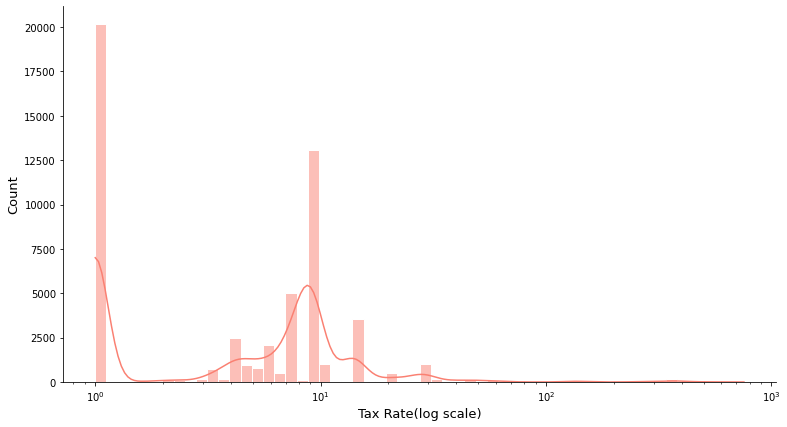

In [26]:
# Distribution of Tax Rate
sns.displot(df["Tax Rate"]+1, color='salmon', kind='hist', log_scale=True, edgecolor='1', kde = True,
           height=6, aspect=11/6).set_axis_labels("Tax Rate(log scale)", "Count", fontsize=13)
plt.savefig('TaxRate.pdf', bbox_inches='tight')

### 16. Tax Type
*Tax Type*(관세율구분코드) indicates type of taxation depending on the trade agreements. For example, code **A** refers to general duty and **C** refers to concessionary tariffs under WTO agreements.

In [27]:
# Number of unique Tax Type
column = "Tax Type"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent Tax types
pd.DataFrame(df[column].value_counts().reset_index().values, columns=[column, "Count"]).head(10)

Number of unique Tax Type :  49


,Tax Type,Count
0,A,20367
1,C,11245
2,FCN1,10569
3,FEU1,3442
4,CIT,2032
5,FUS1,1876
6,FAS1,1158
7,E1,752
8,FVN1,511
9,W2,401


### 17. Country of Origin Indicator
*Country of Origin Indicator*(원산지표시유무코드) specifies whether the country of origin is indicated on the cargo.

- **B** : Indicated only on the package
- **E** : Not indicated / Subject of exemption from country of origin indication
- **G** : Indicated only on the item
- **N** : Not indicated / Subject of country of origin indication
- **S** : Not indicated / Not a subject of country of origin indication
- **Y** : Indicated both on the item and the package

In [28]:
# Number of unique Country of Origin Indicator
column = "Country of Origin Indicator"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent Country of Origin Indicator
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

Number of unique Country of Origin Indicator :  6


,Country of Origin Indicator,Count
0,E,15269
1,G,12374
2,Y,11890
3,B,7750
4,S,6708
5,N,9


### 18. Net Mass
*Net Mass*(신고중량) means the mass of the item excluding the mass of the package. The unit is kilogram(Kg). The value highly depends on the class of item, i.e., *HS6 Code*.

In [29]:
# Number of unique Net Mass
column = "Net Mass"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent Net Mass
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

Number of unique Net Mass :  5704


,Net Mass,Count
0,1.0,1096
1,10.0,843
2,2.0,834
3,5.0,784
4,0.5,630
5,3.0,608
6,0.1,594
7,20.0,590
8,0.4,552
9,100.0,495


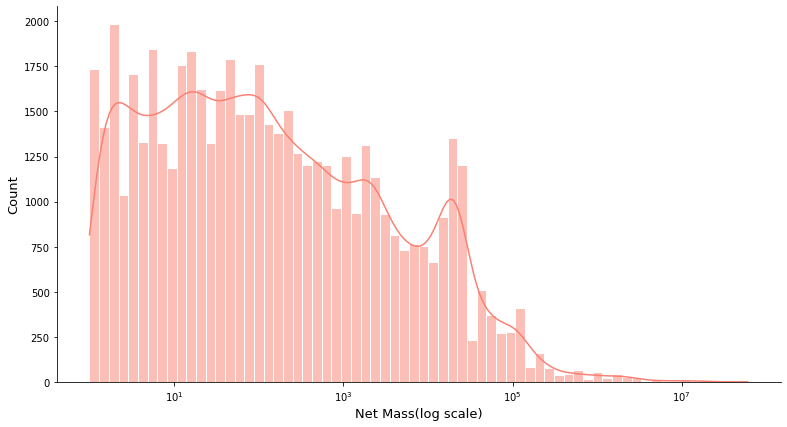

In [30]:
# Distribution of Net Mass
sns.displot(df[column]+1, color='salmon', kind='hist', log_scale=True, edgecolor='1', kde = True,
           height=6, aspect=11/6).set_axis_labels(f"{column}(log scale)", "Count", fontsize=13)

plt.savefig('NetMass.pdf', bbox_inches='tight')

### 19. Item Price
*Item Price*(과세가격원화금액) refers to the price that the tariff is imposed on. The price is in KRW. Usually, the value is assumed as the price of the goods. Sometimes it includes transportation fees or packaging costs. **0.0** is regarded as null value.

In [31]:
# Number of unique Net Mass
column = "Item Price"
print(f'Number of unique {column} : ', df[column].nunique())

# Frequent Net Mass
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

Number of unique Item Price :  15874


,Item Price,Count
0,0.0,506
1,31824000.0,163
2,4512000.0,109
3,15912000.0,90
4,7036800.0,90
5,26520000.0,79
6,2272800.0,68
7,3.0,65
8,1.2,63
9,21216000.0,59


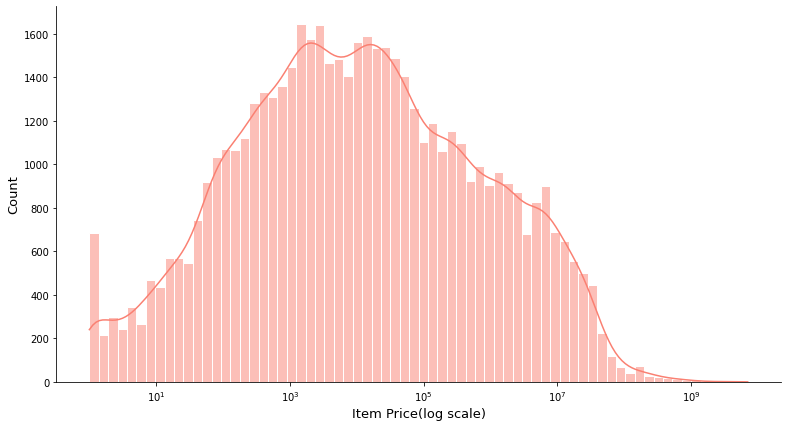

In [32]:
# Distribution of Item Price
sns.displot(df[column]+1, color='salmon', kind='hist', log_scale=True, edgecolor='1', kde = True,
           height=6, aspect=11/6).set_axis_labels(f"{column}(log scale)", "Count", fontsize=13)
plt.savefig('ItemPrice.pdf', bbox_inches='tight')

### 20. Fraud
The customs office inspects suspicious items.  As a result of the inspection, *Fraud*(우범여부) indicates if there exists any error in the declaration. **0** means the declaration passed the inspection, and **1** means it did not.

In [33]:
column='Fraud'

# Number of normal and illicit declarations
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

,Fraud,Count
0,0,42347
1,1,11653


21.6% of the data is fraud declaration.

### 21. Critical Fraud
*Critical Fraud*(핵심우범) indicates the type of fraud depending on the severity. **0** means the declaration passed the inspection, as same as the *Fraud* column. **1** means a minor error, while **2** refers to some critical violation of the law such as tax evasion or insafe items.

In [34]:
column='Critical Fraud'

# Number of each fraud
pd.DataFrame(df[column].value_counts().reset_index()).rename(columns={'index':column, column:'Count'}).head(10)

,Critical Fraud,Count
0,0,42347
1,1,11108
2,2,545
